In [110]:
import pandas as pd
df = pd.read_csv("outputs/results/lr/pythia410m/counterfact.csv")
df["lnum"] = df["parameter"].apply(lambda param: int(param.split(".")[2]))
df["lname"] = df["parameter"].apply(lambda param: param.split(".")[3] + "." + param.split(".")[4])
df = df.sort_values("lnum")
print("0.9")
for i in range(len(df)):
    if df.iloc[i, 7] == 0.9:
        print(df.iloc[i, 5])

print("===============\n0.8")
for i in range(len(df)):
    if df.iloc[i, 7] == 0.8:
        print(df.iloc[i, 5])


0.9
gpt_neox.layers.0.attention.dense.weight
gpt_neox.layers.0.mlp.dense_4h_to_h.weight
gpt_neox.layers.0.attention.query_key_value.weight
gpt_neox.layers.0.mlp.dense_h_to_4h.weight
gpt_neox.layers.1.mlp.dense_h_to_4h.weight
gpt_neox.layers.1.mlp.dense_4h_to_h.weight
gpt_neox.layers.1.attention.dense.weight
gpt_neox.layers.1.attention.query_key_value.weight
gpt_neox.layers.2.mlp.dense_4h_to_h.weight
gpt_neox.layers.2.attention.dense.weight
gpt_neox.layers.2.mlp.dense_h_to_4h.weight
gpt_neox.layers.2.attention.query_key_value.weight
gpt_neox.layers.3.mlp.dense_4h_to_h.weight
gpt_neox.layers.3.attention.query_key_value.weight
gpt_neox.layers.3.mlp.dense_h_to_4h.weight
gpt_neox.layers.3.attention.dense.weight
gpt_neox.layers.4.attention.query_key_value.weight
gpt_neox.layers.4.mlp.dense_h_to_4h.weight
gpt_neox.layers.4.attention.dense.weight
gpt_neox.layers.4.mlp.dense_4h_to_h.weight
gpt_neox.layers.5.mlp.dense_4h_to_h.weight
gpt_neox.layers.5.mlp.dense_h_to_4h.weight
gpt_neox.layers.5.at

In [103]:
df["accuracy_diff"] = df["edited_top1_accuracy"] - df["final_top1_accuracy"]

Missing:

Pythia 410

======================
0.8

block 1     

block 2     

block3      16 17 18 19 20 21 22 23  (running)

block 4     3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 (running)


======================
0.9

block 1     

block 2     

block3      14 20 21 22 23 (running)

block 4     20 21 22 23 (running)



In [111]:
import pandas as pd
df = pd.read_csv("outputs/results/lr/pythia160m/counterfact.csv")
df["lnum"] = df["parameter"].apply(lambda param: int(param.split(".")[2]))
df["lname"] = df["parameter"].apply(lambda param: param.split(".")[3] + "." + param.split(".")[4])
df = df.sort_values("lnum")
print("0.9")
for i in range(len(df)):
    if df.iloc[i, 7] == 0.9:
        print(df.iloc[i, 5])

print("===============\n0.8")
for i in range(len(df)):
    if df.iloc[i, 7] == 0.8:
        print(df.iloc[i, 5])

0.9
gpt_neox.layers.0.mlp.dense_h_to_4h.weight
gpt_neox.layers.0.attention.query_key_value.weight
gpt_neox.layers.0.mlp.dense_4h_to_h.weight
gpt_neox.layers.1.attention.dense.weight
gpt_neox.layers.1.attention.query_key_value.weight
gpt_neox.layers.1.mlp.dense_h_to_4h.weight
gpt_neox.layers.1.mlp.dense_4h_to_h.weight
gpt_neox.layers.2.mlp.dense_4h_to_h.weight
gpt_neox.layers.2.mlp.dense_h_to_4h.weight
gpt_neox.layers.2.attention.query_key_value.weight
gpt_neox.layers.3.mlp.dense_h_to_4h.weight
gpt_neox.layers.3.mlp.dense_4h_to_h.weight
gpt_neox.layers.3.attention.query_key_value.weight
gpt_neox.layers.4.attention.dense.weight
gpt_neox.layers.4.mlp.dense_h_to_4h.weight
gpt_neox.layers.4.attention.query_key_value.weight
gpt_neox.layers.4.mlp.dense_4h_to_h.weight
gpt_neox.layers.5.mlp.dense_4h_to_h.weight
gpt_neox.layers.5.mlp.dense_h_to_4h.weight
gpt_neox.layers.5.attention.query_key_value.weight
gpt_neox.layers.5.attention.dense.weight
gpt_neox.layers.6.mlp.dense_h_to_4h.weight
gpt_neox

Missing:

Pythia 160

======================
0.8

block 1     

block 2     

block3      0 2 3

block 4     


======================
0.9

block 1     

block 2     

block3      

block 4     


In [105]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [106]:
df8 = df[df["rate"] == 0.8]
df9 = df[df["rate"] == 0.9]

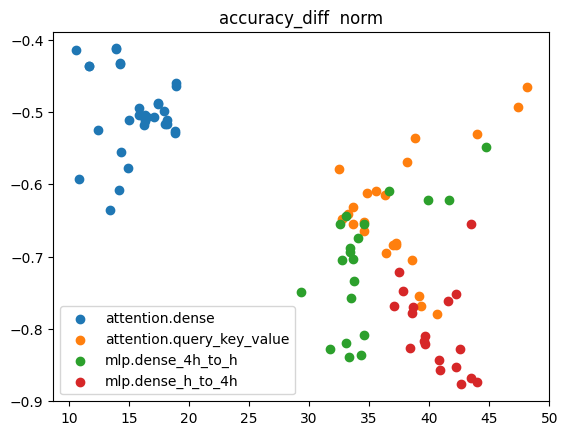

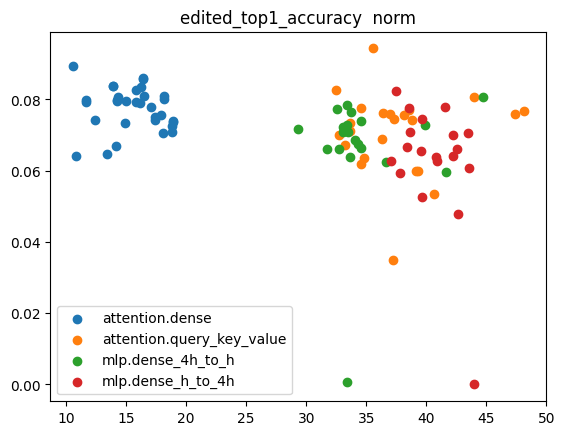

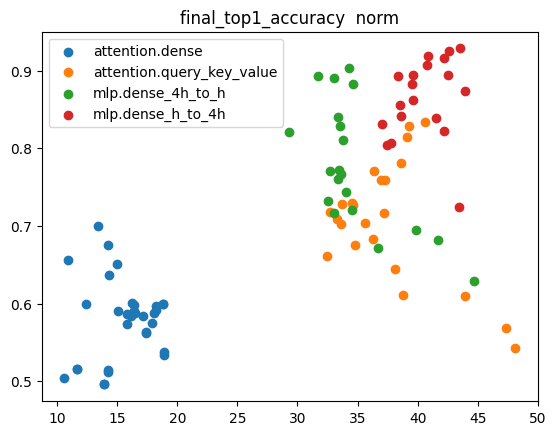

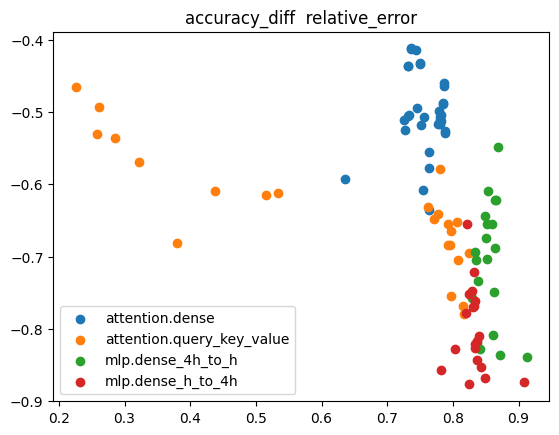

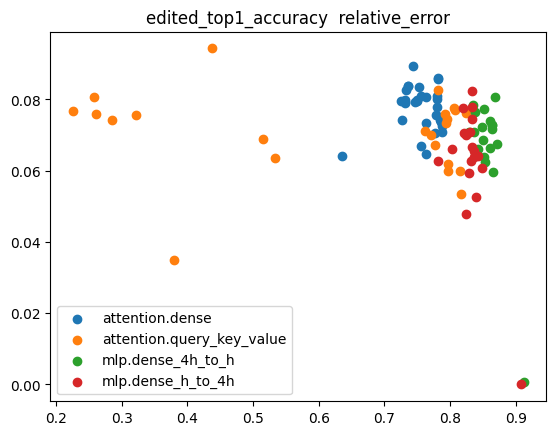

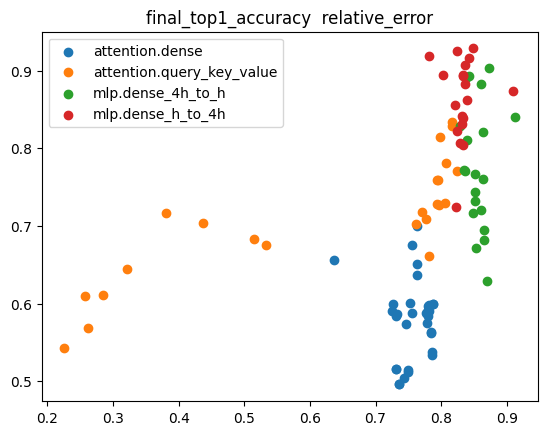

In [107]:
groups = df9.groupby('lname')

metrics = ["norm", "relative_error"]
outputs = ["accuracy_diff", "edited_top1_accuracy", "final_top1_accuracy"]





for m in metrics:
    for o in outputs:
        # Plot
        fig, ax = plt.subplots()
        ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
        for name, group in groups:
            ax.scatter(group[m], group[o], marker='o', label=name)
        ax.legend()
        plt.title(o + "  " + m)
        fig.savefig("outputs/plots/"+ o + "_vs_" + m + '.png')

        plt.show()

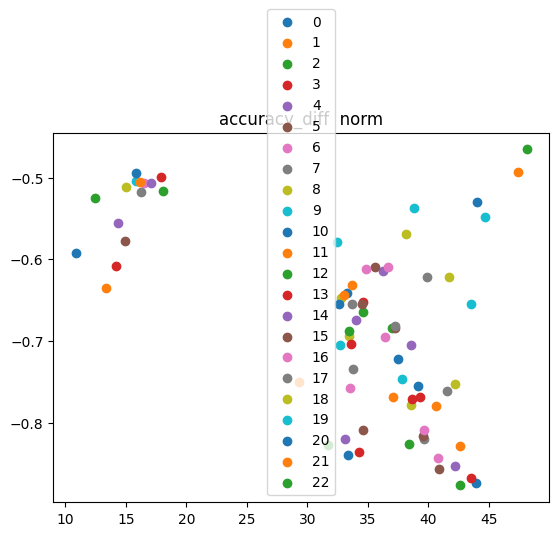

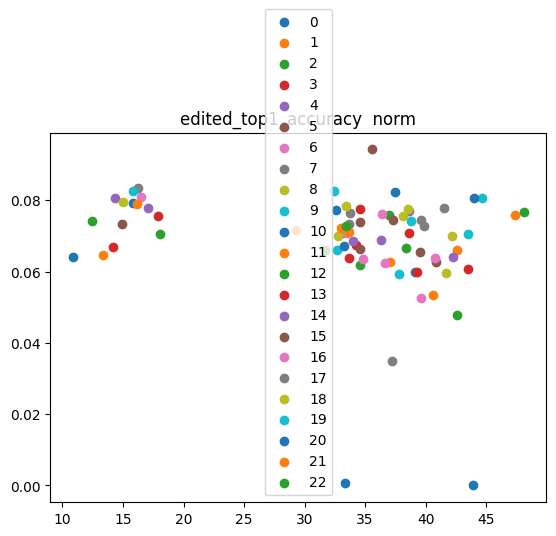

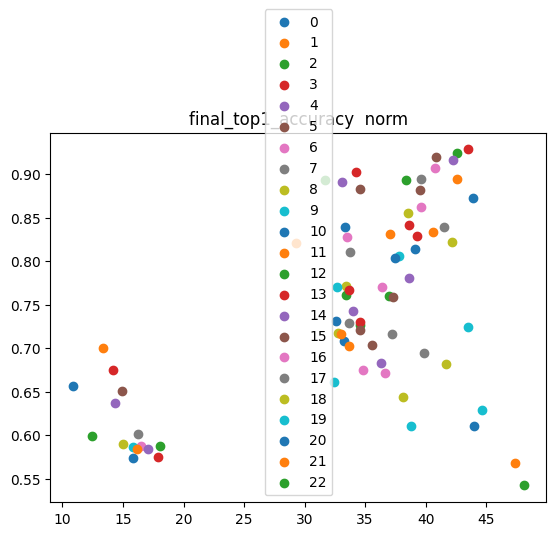

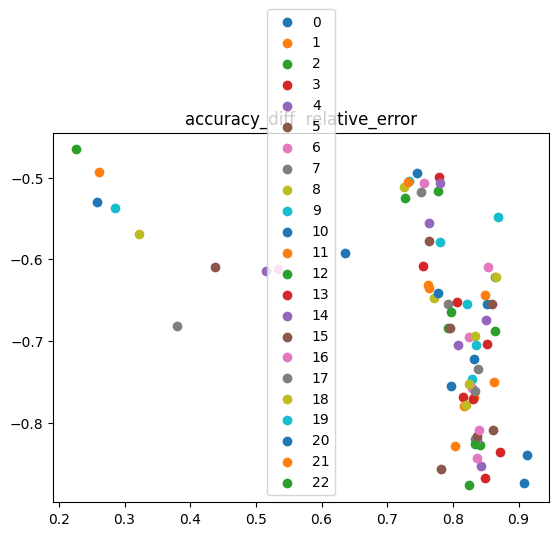

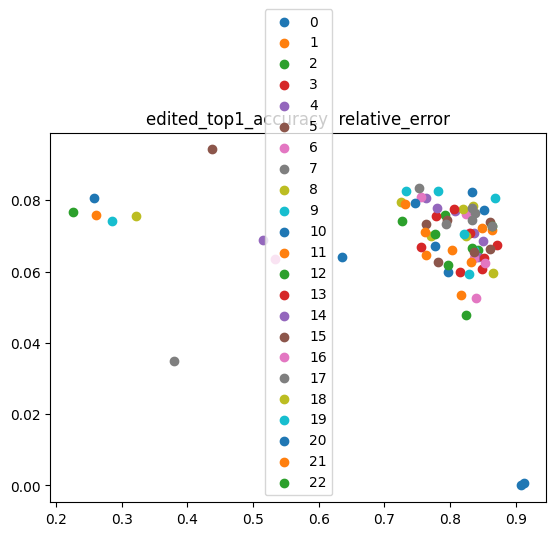

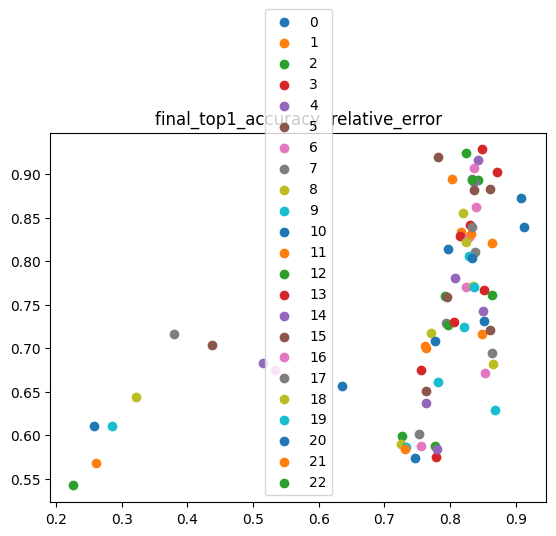

In [95]:
groups = df9.groupby('lnum')

metrics = ["norm", "relative_error"]
outputs = ["accuracy_diff", "edited_top1_accuracy", "final_top1_accuracy"]

for m in metrics:
    for o in outputs:
        # Plot
        fig, ax = plt.subplots()
        ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
        for name, group in groups:
            ax.scatter(group[m], group[o], marker='o', label=name)
        ax.legend()
        plt.title(o + "  " + m)
        fig.savefig("outputs/plots/"+ o + "_vs_" + m + '.png')

        plt.show()

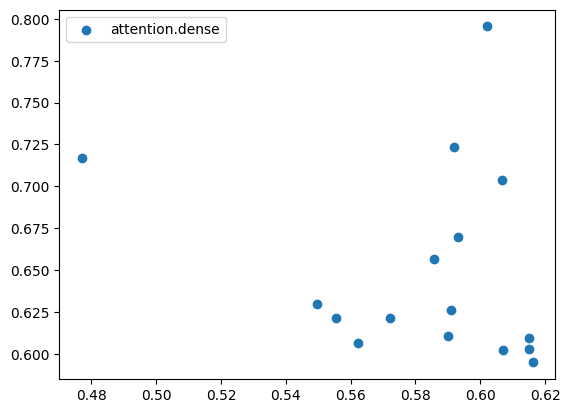

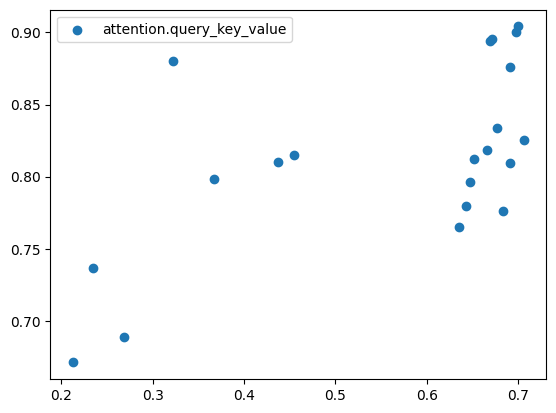

In [96]:
groups = df8.groupby('lname')


regressor = LinearRegression()

for name, group in groups:
    plt.scatter(group["relative_error"], group["final_top1_accuracy"], marker='o', label=name)
    plt.legend()
    plt.show()


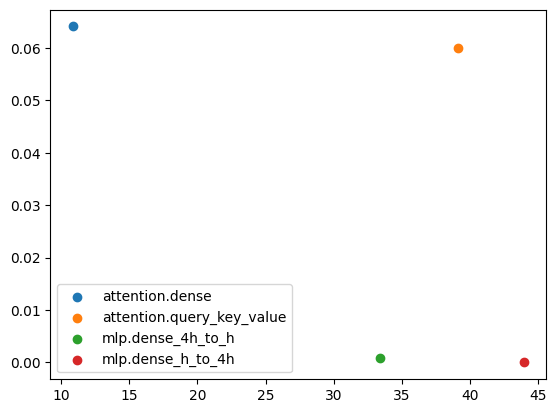

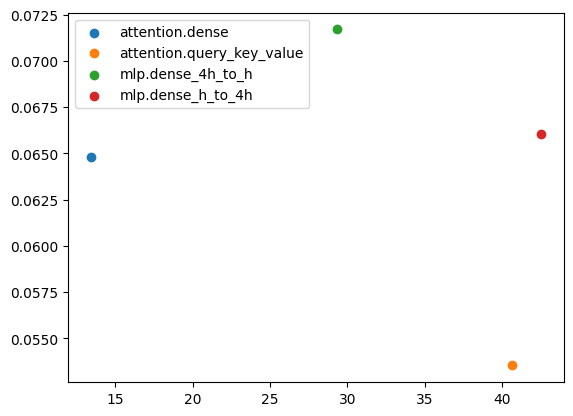

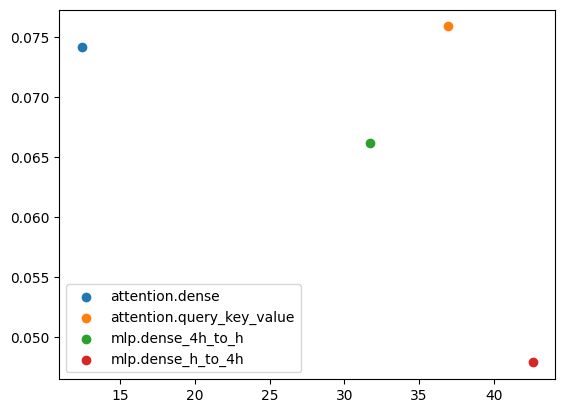

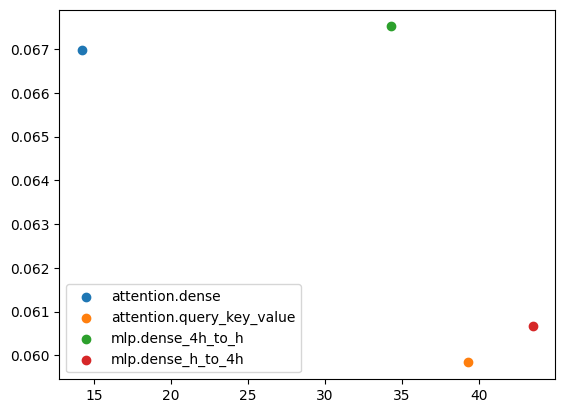

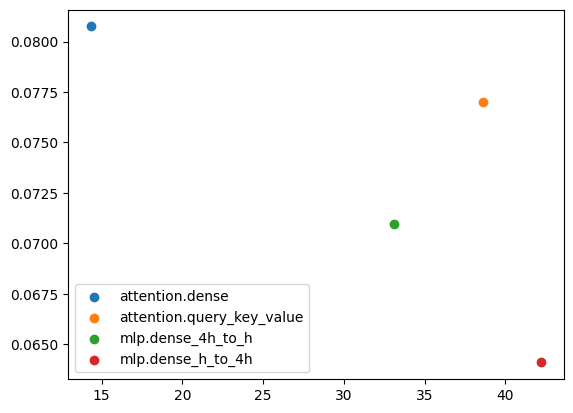

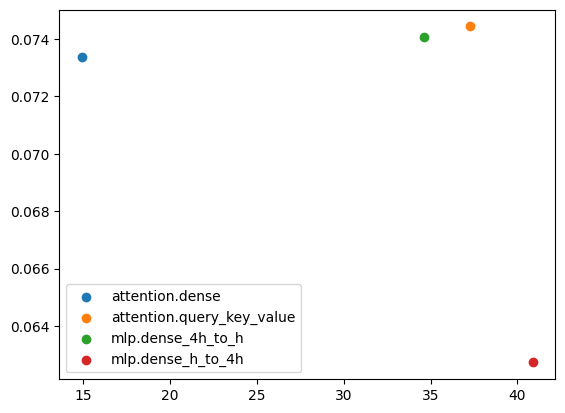

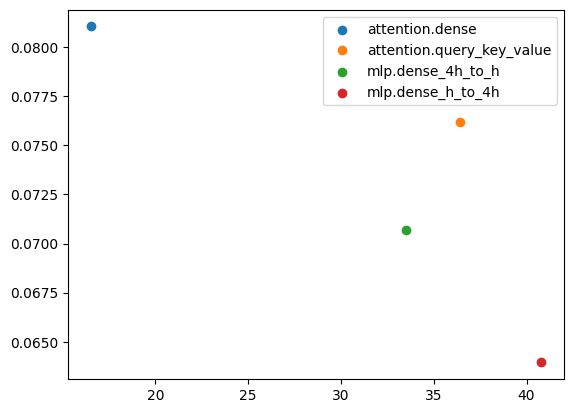

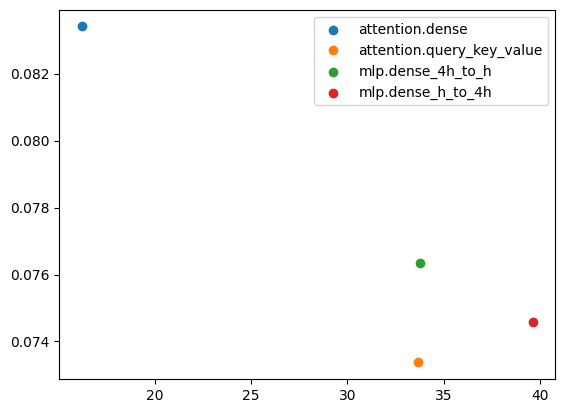

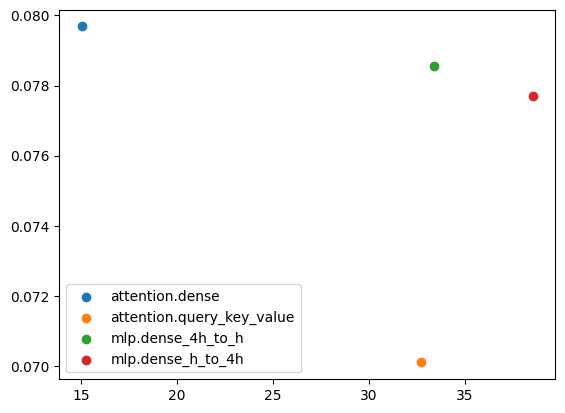

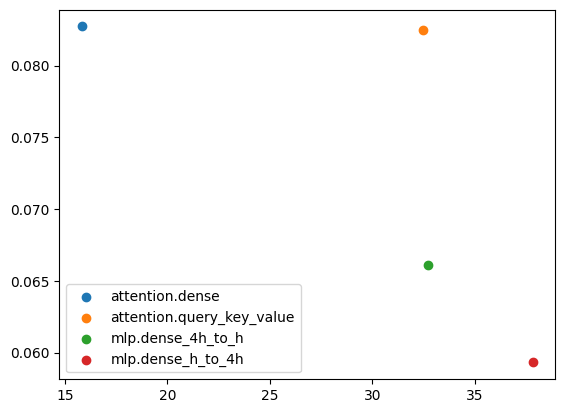

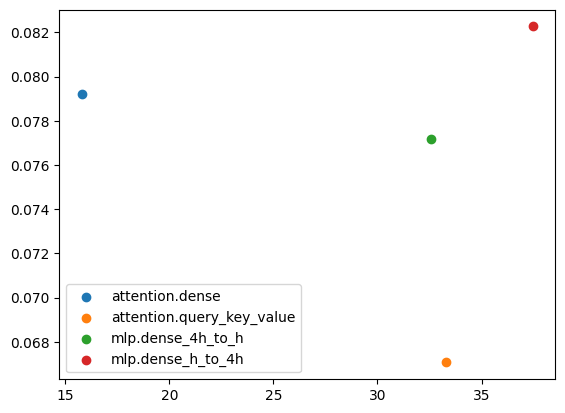

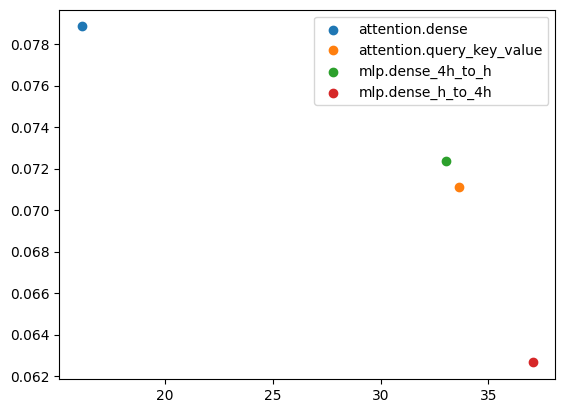

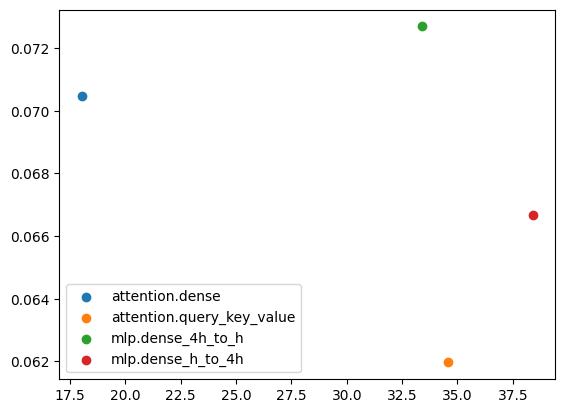

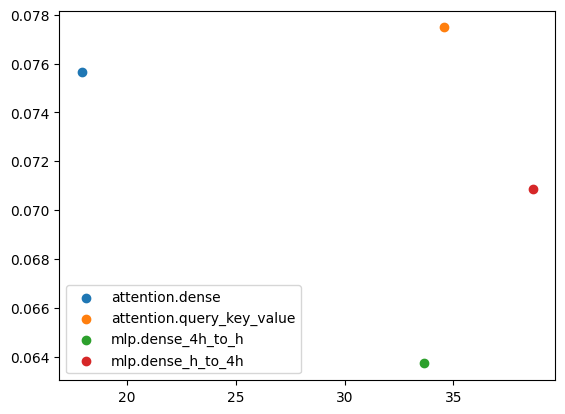

In [98]:
df_lnum0 = df[df["lnum"] == 0]

for l in range(14):
    df_lnum = df9[df9["lnum"] == l]
    groups = df_lnum.groupby('lname')
    fig, ax = plt.subplots()
    for name, group in groups:
        ax.scatter(group["norm"], group["edited_top1_accuracy"], marker='o', label=name)
        ax.legend()
    plt.show()


